In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##Read the salmon survival data
file_path="Data/ZooPlanktonPerryData.xlsx"

plankton_data = pd.read_excel(file_path)
SalmonSurvivals_data = pd.read_excel(file_path, sheet_name="5. Salmon marine survivals" )

In [3]:
## Read the Annual Mean Sea Levels
#Take the years between 1990 and 2017 
#Take the positive values (non existent data entered as -99999

file_path="Data/SeaLevel_Point_Atkinson193.txt"
seaLevelPointA =pd.read_csv(file_path, header=None,delimiter=';')
df=seaLevelPointA
seaLevelPointA_clean= df[(df[0] >= 1990) & (df[0] <= 2017) & (df[1]>=0)]

file_path="Data/SeaLevel_Port_Angeles2127.txt"
seaLevelPortA =pd.read_csv(file_path, header=None,delimiter=';')
df=seaLevelPortA
seaLevelPortA_clean= df[(df[0] >= 1990) & (df[0] <= 2017)&(df[1]>=0)]

file_path="Data/SeaLevel_Campbell_River1323.txt"
seaLevelCampbellR=pd.read_csv(file_path, header=None,delimiter=';')
df=seaLevelCampbellR
seaLevelCampbellR_clean= df[(df[0] >= 1990) & (df[0] <= 2017)&(df[1]>=0)]

file_path="Data/SeaLevel_Cherry_annualMean.txt"
seaLevelCherryP = pd.read_csv(file_path, header=None,delimiter=';')
df=seaLevelCherryP
seaLevelCherryP_clean= df[(df[0] >= 1990) & (df[0] <= 2017)&(df[1]>=0)]


In [4]:
#Merge the sea Levels
#Calculate their average (missing data is ignored)

merged_df= pd.merge(seaLevelCherryP_clean, seaLevelPointA_clean, on=0, how='outer', suffixes=('_CherryP', '_PointA'))
merged_df = pd.merge(merged_df, seaLevelPortA_clean, on=0, how='outer')
merged_df = pd.merge(merged_df, seaLevelCampbellR_clean, on=0, how='outer', suffixes=('_PortA', '_CampbellR'))

column_list = ['1_CherryP', '1_PointA', '1_PortA', '1_CampbellR']

# Calculate the average
averaged_data = merged_df[column_list].mean(axis=1, skipna=True)
averaged_seaLevels = pd.DataFrame({'Year': merged_df[0], 'Average': averaged_data})

#Sort by year (otherwise for some reason year 1994 goes at the end)
averaged_seaLevels.sort_values(by='Year', inplace=True)

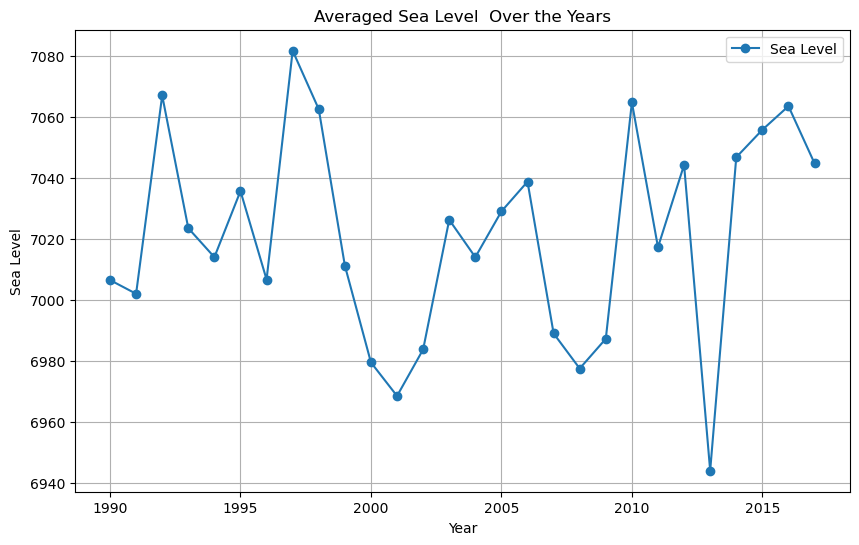

In [5]:
## Plot Annual Mean Sea Level Over the years
plt.figure(figsize=(10, 6))

plt.plot(averaged_seaLevels['Year'], averaged_seaLevels['Average'], label="Sea Level", marker='o')

plt.title('Averaged Sea Level  Over the Years')
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.legend()
plt.grid(True)
plt.show()

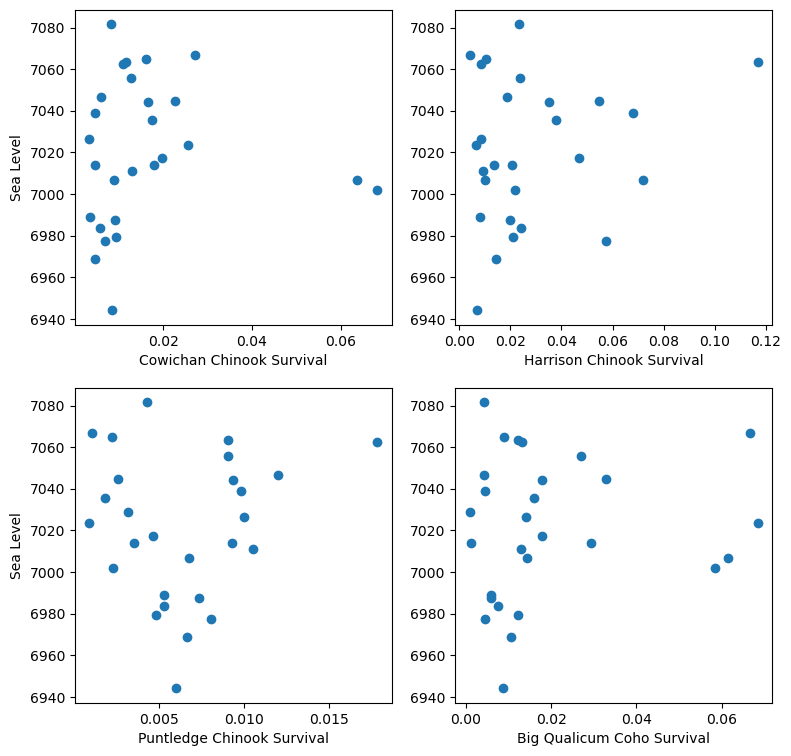

In [6]:
# Create a scatter plot 

#Merge Sea Level and Salmon Survival
merged_SLSS = pd.merge(averaged_seaLevels, SalmonSurvivals_data, left_on='Year', right_on='Ocean Entry Year')
salmonTypes_List = ['Cowichan Chinook', 'Harrison Chinook', 'Puntledge Chinook', 'Big Qualicum Coho']

## fill in plt.subplots
fig,axes = plt.subplots(2,2,figsize=(9,9))

## fill in the 0,0 plot here
salmon_type=salmonTypes_List[0]
axes[0,0].scatter(merged_SLSS[salmon_type], merged_SLSS['Average'], label=salmon_type, marker='o')
axes[0,0].set_xlabel(salmon_type+ ' Survival', fontsize=10)
axes[0,0].set_ylabel('Sea Level', fontsize=10)

## fill in the 0,1 plot here
salmon_type=salmonTypes_List[1]
axes[0,1].scatter(merged_SLSS[salmon_type],  merged_SLSS['Average'], label=salmon_type, marker='o')
axes[0,1].set_xlabel(salmon_type+ ' Survival', fontsize=10)

## fill in the 1,0 plot here
salmon_type=salmonTypes_List[2]
axes[1,0].scatter(merged_SLSS[salmon_type],  merged_SLSS['Average'], label=salmon_type, marker='o')
axes[1,0].set_xlabel(salmon_type+ ' Survival', fontsize=10)
axes[1,0].set_ylabel('Sea Level', fontsize=10)

## fill in the 1,1 plot here
salmon_type=salmonTypes_List[3]
axes[1,1].scatter(merged_SLSS[salmon_type],  merged_SLSS['Average'], label=salmon_type, marker='o')
axes[1,1].set_xlabel(salmon_type+ ' Survival', fontsize=10)

# Display the plot
plt.show()

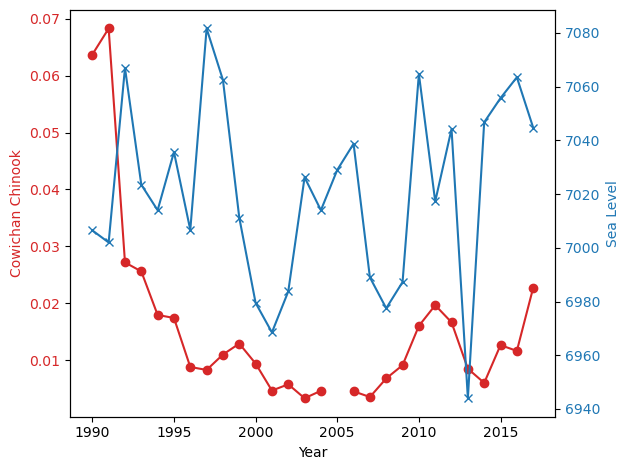

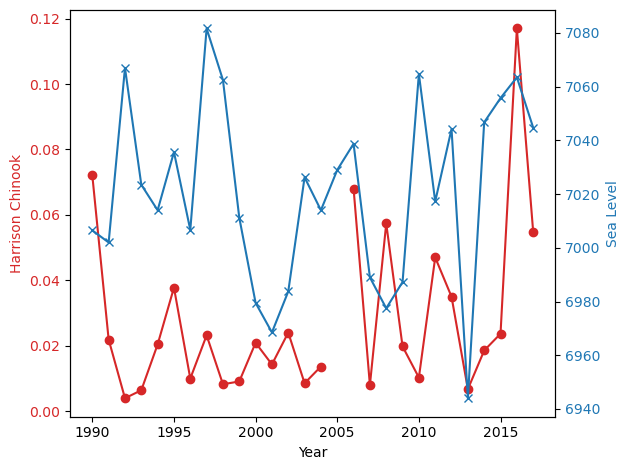

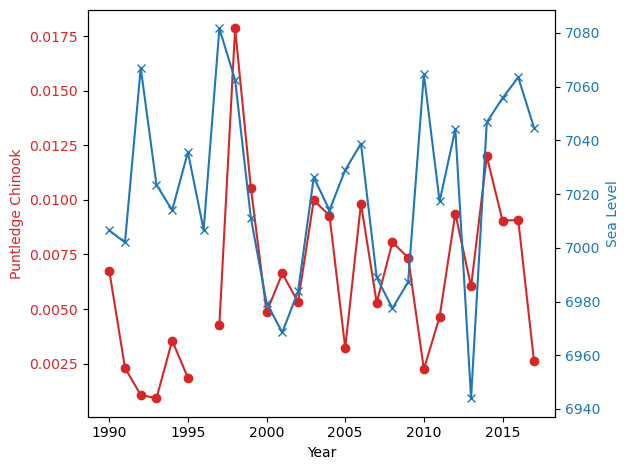

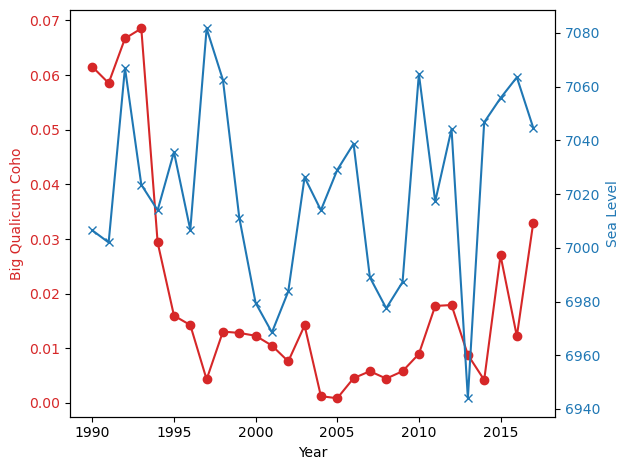

In [7]:
#Line Plot with different y-axis
#Salmon Types and Sea Level over the years

#salmonTypes_List = ['Cowichan Chinook', 'Harrison Chinook', 'Puntledge Chinook', 'Big Qualicum Coho']
for salmon_type in salmonTypes_List:

    # Line plotting 
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel(salmon_type, color=color)
    ax1.plot(merged_SLSS['Ocean Entry Year'], merged_SLSS[salmon_type], color=color, marker='o')
    ax1.tick_params(axis='y', labelcolor=color)

    #a second axes that shares the same x-axis
    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel('Sea Level', color=color)
    ax2.plot(merged_SLSS['Ocean Entry Year'], merged_SLSS['Average'], color=color,marker='x')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()